In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm

from utils.cuda_cluster import *
from utils.dataset import read_data, factorize_small_cardinality_with_index

import core.config as conf

/home/nyongja/anaconda3/envs/nvidia/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37255 instead
  http_address["port"], self.http_server.port


In [2]:
client

Client Scheduler: tcp://127.0.0.1:43507 Dashboard: http://127.0.0.1:37255/status,Cluster Workers: 1 Cores: 1 Memory: 33.47 GB


In [3]:
NP = 16
# data_path = conf.raw_data_path + '*' # for all dataset
data_path = conf.raw_data_path + 'part-00175'
ori_df = read_data(data_path)

number of rows: 3033347


In [4]:
columns = ['tweet_id',
           'engaged_with_user_id',
           'enaging_user_id',
           'tweet_timestamp',
           'like_timestamp',
           'retweet_timestamp',
           'reply_timestamp',
           'retweet_with_comment_timestamp',
           'engagee_follows_engager']
df = ori_df[columns]
df.head()

,tweet_id,engaged_with_user_id,enaging_user_id,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,engagee_follows_engager
id,,,,,,,,,
1,C8F345CF8BC7A86E34572072ECFBBEC4,BC99C936FE4C2A1FDB0CD09295CAA53C,411C3FA9B6AB5CA95192D875CDC22823,1612993854,1613048460,0,0,0,True
2,C1E31636C343B780BA776E4B73147028,F4ADB8DEADF1980D0B5C2B796C108F78,E764026AB0E38A5C2FF19921D73B6C18,1612886900,0,0,0,0,False
3,B436C84E80C2430BA9DE41FDF04C73BF,59EBFE44ABE4C5E31528340304F529C3,455134BAAD3EAC4093393EC233FBAEF9,1614019237,0,0,1614019431,0,True
4,033FFA42C8AD502057AE96C8B4B812BE,DF6A02AB1731A91FA46A2259F398F57B,92D70497B86CAFBA5C51E331084462AD,1612779567,1612780118,0,0,0,True
5,84F2E902BA3CF3B34B8D056F6F78D488,A656845C3239DB662CFD45D64F2B94F5,DC1C8A9412B9E266A4C3D4CAF6DB06CB,1613822114,0,0,0,0,True


### tweet id encode

In [5]:
df, tweet_id_index, _ = factorize_small_cardinality_with_index(df, "tweet_id", "tweet_id_encode")
df.head()

,tweet_id,engaged_with_user_id,enaging_user_id,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,engagee_follows_engager,tweet_id_encode
0,F0154ECB3EDBD9B0CD8A2EEF6BC8B7E2,AFE540F24A072FA6E5CA2111CC7B4EFB,511A981CB3A226F2E9B2752B9C28C348,1613786513,0,0,0,0,False,2645151
1,30E117B824494B7F180BB001820FEC81,F1E57848EBF5EC052958D1C7864BBD5F,E2BB884423C0AC9277C456D25A01BED6,1612911936,1612914134,0,0,0,True,538834
2,DC64CAF9F513A9F7E77D2AE82D4F4DFE,1A11E5C934389917456FBB94B832632A,E70F7540D29F42018F3007F1C5C36A5D,1612446783,1612447022,0,0,0,True,2428417
3,8C4D149226DDD3D6E5576C08B093B71B,AC00F8D3D4F54100EF1B59F5633E5280,96BED475461ACE9C29509CF6E5B9341B,1614188749,0,0,0,0,True,1546781
4,F85EE5AB7B8416C396FAB23FD6B75CCA,9ECF49B050BD07548200B98828C81A1B,29E48D0E0C48F6346427C77C6B6FE368,1613890031,0,0,0,0,False,2737181


In [6]:
df = df.drop("tweet_id", axis = 1)
df = df.rename(columns = {"index" : "tweet_id_encode"})
df.head()

,engaged_with_user_id,enaging_user_id,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,engagee_follows_engager,tweet_id_encode
0,AFE540F24A072FA6E5CA2111CC7B4EFB,511A981CB3A226F2E9B2752B9C28C348,1613786513,0,0,0,0,False,2645151
1,F1E57848EBF5EC052958D1C7864BBD5F,E2BB884423C0AC9277C456D25A01BED6,1612911936,1612914134,0,0,0,True,538834
2,1A11E5C934389917456FBB94B832632A,E70F7540D29F42018F3007F1C5C36A5D,1612446783,1612447022,0,0,0,True,2428417
3,AC00F8D3D4F54100EF1B59F5633E5280,96BED475461ACE9C29509CF6E5B9341B,1614188749,0,0,0,0,True,1546781
4,9ECF49B050BD07548200B98828C81A1B,29E48D0E0C48F6346427C77C6B6FE368,1613890031,0,0,0,0,False,2737181


### user id encode

In [7]:
user_a = df["engaged_with_user_id"]
user_b = df["enaging_user_id"]
user_df = dask.dataframe.concat([user_a, user_b], axis = 0).unique().to_frame()

In [8]:
user_df = user_df.rename(columns = {0:"user"})
user_df, _, _ = factorize_small_cardinality_with_index(user_df, "user", "user_encode")
user_df.head()

,user,user_encode
0,0112439B8F0411BA77F8A2FED524FD15,14912
1,01128F8F1CAF9548F2835655F479D19F,14928
2,0112842ECD9B81708EF4E203B363F722,14920
3,0112ADBE1602E3B6A031C73F01D3541A,14936
4,011245B282AF0A5529481A6AB5BD5F6D,14913


In [9]:
user_df = user_df.set_index("user")

In [10]:
df = df.merge(user_df, left_on = "engaged_with_user_id", right_index = True, how='left')

In [11]:
df = df.rename(columns = {"user_encode" : "engaged_user_encode"})
df.head()

,engaged_with_user_id,enaging_user_id,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,engagee_follows_engager,tweet_id_encode,engaged_user_encode
19168,6B4EFA6921C995B0F5DAE00B7E06C3C6,77855C6BA2CD0CD456FF22E459851E46,1612412002,0,0,0,0,False,2435735,1471530
19184,B7B2D0B766DACE9D99B04F3517F334F3,648DC64F4AF979EC7361AF04C45A49AB,1613678748,0,1613685059,0,0,False,1375799,2519030
19176,E53716B4897FE916CF78047D25427A92,3DF434CB65E1025B99BF2F6FE1CED0D6,1614147795,0,0,0,0,False,1242060,3143618
19192,4E93CF61DA3F7BC26CAA15FEAF494B6E,E1B8D3A0EC4FAEBB3F0828322085F607,1613626363,1613628936,0,0,0,True,179986,1078536
19169,2AC9B00375AA4E2D621DD934752C5A0C,296E12C9B65C3E1168DC369C40F47594,1613902986,0,0,0,0,False,1395611,587053


In [12]:
df = df.merge(user_df, left_on="enaging_user_id", right_index = True, how='left')

In [13]:
df = df.rename(columns = {"user_encode" : "engaging_user_encode"})
df.head()

,engaged_with_user_id,enaging_user_id,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,engagee_follows_engager,tweet_id_encode,engaged_user_encode,engaging_user_encode
10848,40436A39A6980F63A2EDF632612E744A,8DD96CD58EC41BBCBC9A0DC112FAE5E8,1613858012,1613877419,0,0,0,False,447624,882148,1945470
10852,D4F0E932769C50D0611570C47B5379EE,98D6CD1D676004D33A3C4C01FFF43A9C,1612531978,1612533517,0,0,0,False,2757682,2919840,2096063
10850,5A0F23B30DBA83275EB24EC28081DBAD,4E820BC2011EAC04E17BD4061277B0FA,1613237047,1613237192,0,0,0,True,1183335,1235860,1077589
10854,47E9FAA5F7186C7CF64DDFC8EFE76341,F92C7DE983989CCD32BCBBB5A2283E86,1613658303,1613703059,0,0,0,False,1685721,987102,3417691
10864,20FA50CAF9B4CD7624E623CD9DC489B5,0430154A7FA4795911CC2602A80BA430,1612442920,0,0,0,0,True,987626,452405,57625


In [14]:
df = df.drop(["engaged_with_user_id", "enaging_user_id"], axis = 1)

In [15]:
df = df.repartition(npartitions=NP)
df, = dask.persist(df)

In [16]:
df.head()

,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,engagee_follows_engager,tweet_id_encode,engaged_user_encode,engaging_user_encode
7456,1613063113,0,0,0,0,True,2715104,1115211,1895108
7460,1612791237,0,1612791405,0,0,False,1473698,1305309,1901508
7458,1613281826,1613282071,0,0,0,True,1235775,1979607,760341
7462,1613269010,0,1613296352,0,0,True,1352971,638223,2694780
7472,1613034048,0,0,0,0,False,2393756,2798379,445368


## Anlysis engagement with tweet timestamp (follow)

In [17]:
df["like_timestamp"] = df["like_timestamp"] - df["tweet_timestamp"]
df["retweet_timestamp"] = df["retweet_timestamp"] - df["tweet_timestamp"]
df["reply_timestamp"] = df["reply_timestamp"] - df["tweet_timestamp"]
df["retweet_with_comment_timestamp"] = df["retweet_with_comment_timestamp"] - df["tweet_timestamp"]

In [18]:
follow_df = df[df["engagee_follows_engager"] == True]
no_follow_df = df[df["engagee_follows_engager"] == False]

In [19]:
time = ["5", "60", "240", "480", "1440", "101080"]
follow_values = []
no_follow_values = []

In [20]:
prev_time = 0
for i in time :
    i = int(i)
    like_count = follow_df[(follow_df["like_timestamp"]>=prev_time) & (follow_df["like_timestamp"]<i*60)].count().values.compute()[0]
    retweet_count = follow_df[(follow_df["retweet_timestamp"]>=prev_time) & (follow_df["retweet_timestamp"]<i*60)].count().values.compute()[0]
    reply_count = follow_df[(follow_df["reply_timestamp"]>=prev_time) & (follow_df["reply_timestamp"]<i*60)].count().values.compute()[0]
    comment_count = follow_df[(follow_df["retweet_with_comment_timestamp"]>=prev_time) & (follow_df["retweet_with_comment_timestamp"]<i*60)].count().values.compute()[0]
    all_count = like_count + retweet_count + reply_count + comment_count
    follow_values.append(int(all_count))
    prev_time = i

In [21]:
prev_time = 0
for i in time :
    i = int(i)
    like_count = no_follow_df[(no_follow_df["like_timestamp"]>=prev_time) & (no_follow_df["like_timestamp"]<int(i)*60)].count().values.compute()[0]
    retweet_count = no_follow_df[(no_follow_df["retweet_timestamp"]>=prev_time) & (no_follow_df["retweet_timestamp"]<int(i)*60)].count().values.compute()[0]
    reply_count = no_follow_df[(no_follow_df["reply_timestamp"]>=prev_time) & (no_follow_df["reply_timestamp"]<int(i)*60)].count().values.compute()[0]
    comment_count = no_follow_df[(no_follow_df["retweet_with_comment_timestamp"]>=prev_time) & (no_follow_df["retweet_with_comment_timestamp"]<int(i)*60)].count().values.compute()[0]
    all_count = like_count + retweet_count + reply_count + comment_count
    no_follow_values.append(int(all_count))
    prev_time = i

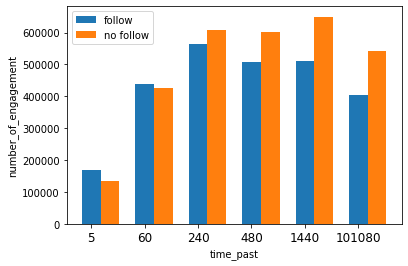

In [22]:
index = np.arange(len(time))
bar_width = 0.35
p1 = plt.bar(index, follow_values, bar_width, label = 'follow')
p2 = plt.bar(index + bar_width, no_follow_values, bar_width, label = 'no_follow')
plt.xlabel('time_past')
plt.ylabel('number_of_engagement')
plt.xticks(index, time, fontsize=12)
plt.legend((p1[0], p2[0]), ('follow', 'no follow'), fontsize=10)
plt.show()

## Anlysis engaged user's engaging pattern with timestamp

In [23]:
tweet_id_index = tweet_id_index.set_index('index')
tweet_id_index = dask_cudf.from_cudf(tweet_id_index, npartitions=16)

In [24]:
tweet_id_index = tweet_id_index.merge(df, left_index = True, right_on = "tweet_id_encode", how='left')

In [25]:
tweet_id_index = tweet_id_index[["tweet_id_encode", "engaged_user_encode", "tweet_timestamp"]]

In [26]:
tweet_id_index.head()

,tweet_id_encode,engaged_user_encode,tweet_timestamp
111358,8352,1528566,1612824484
31688,8368,1442053,1613431040
165532,8360,2339988,1613965316
163205,8376,3473598,1613063302
52787,8353,2549046,1612564373


In [27]:
usr_lst = tweet_id_index["engaged_user_encode"].values.compute().tolist()

In [28]:
usr_lst

[1528566,
 1442053,
 2339988,
 3473598,
 2549046,
 1842784,
 1190764,
 418831,
 2700754,
 87259,
 2791365,
 2942998,
 2806602,
 1653418,
 1441632,
 1886910,
 128242,
 6270,
 2956284,
 32150,
 3312600,
 1557649,
 323946,
 2661478,
 3453111,
 2525253,
 2543445,
 807528,
 1894941,
 2167973,
 1881940,
 866432,
 1773788,
 2017487,
 1173193,
 528993,
 3377230,
 3416501,
 2841346,
 1151937,
 2368969,
 121249,
 518855,
 1048725,
 1147153,
 1343855,
 2601097,
 278821,
 868081,
 2466065,
 93545,
 2711264,
 2062047,
 1297082,
 1427569,
 1963324,
 3289659,
 2511671,
 1830846,
 293587,
 2655705,
 2048856,
 1859335,
 505907,
 1337615,
 1112611,
 889889,
 2596822,
 3422659,
 2577968,
 758717,
 2571027,
 9619,
 2238086,
 1635646,
 1437461,
 1952142,
 1302658,
 2773640,
 2598073,
 2275059,
 1278924,
 744099,
 1664359,
 672969,
 2266689,
 2912496,
 2968591,
 1469871,
 1784172,
 284260,
 1369389,
 147765,
 2529708,
 3382446,
 693072,
 3092308,
 3123218,
 38792,
 1973841,
 3036412,
 1254830,
 3041800,
 33

In [29]:
values = [0 for _ in range(len(time))]

In [30]:
tweet_id_index = tweet_id_index.compute()

In [31]:
df = df.compute()

In [32]:
tmp = df[df["engaging_user_encode"]==117989]

In [33]:
type(tmp)

cudf.core.dataframe.DataFrame

In [35]:
tweet_id_index

,tweet_id_encode,engaged_user_encode,tweet_timestamp
111358,8352,1528566,1612824484
31688,8368,1442053,1613431040
165532,8360,2339988,1613965316
163205,8376,3473598,1613063302
52787,8353,2549046,1612564373
...,...,...,...
127582,2821129,2873671,1612710012
215908,2821129,2873671,1612710012
255292,2821129,2873671,1612710012
210457,2821129,2873671,1612710012


106279it [1:10:50, 24.63it/s]

In [37]:
df

,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,engagee_follows_engager,tweet_id_encode,engaged_user_encode,engaging_user_encode
18368,1614128947,22226,-1614128947,-1614128947,-1614128947,False,2149611,806234,1472814
18372,1613452173,171,-1613452173,-1613452173,-1613452173,False,298301,3113928,1294361
18370,1613725193,-1613725193,-1613725193,-1613725193,-1613725193,False,2486068,471796,654167
18374,1612764081,-1612764081,27825,-1612764081,-1612764081,False,1733396,143593,2919602
18384,1614084691,-1614084691,-1614084691,-1614084691,-1614084691,False,2004360,2268184,375432
...,...,...,...,...,...,...,...,...,...
46565,1613165736,-1613165736,-1613165736,-1613165736,-1613165736,False,2213711,3194567,482225
50103,1613133765,-1613133765,-1613133765,-1613133765,-1613133765,True,2574747,726725,1521043
46579,1613088024,-1613088024,-1613088024,-1613088024,-1613088024,True,1674265,954284,3259669
46577,1613248041,-1613248041,-1613248041,-1613248041,-1613248041,True,2757695,2213750,2465801


In [38]:
df[df["engaging_user_encode"]==1472814]

,tweet_timestamp,like_timestamp,retweet_timestamp,reply_timestamp,retweet_with_comment_timestamp,engagee_follows_engager,tweet_id_encode,engaged_user_encode,engaging_user_encode
18368,1614128947,22226,-1614128947,-1614128947,-1614128947,False,2149611,806234,1472814


In [39]:
time

['5', '60', '240', '480', '1440', '101080']

In [ ]:
df['time5'] = df

In [40]:
df.groupby(['engaged_user_encode'])['tweet_id_encode'].agg(lambda x: x.like_timestamp - ) )

engaged_user_encode
774657     1
552548     1
1667437    1
366043     1
1251633    7
          ..
270130     1
348210     1
3133069    1
1300378    1
2307672    1
Name: tweet_id_encode, Length: 1558866, dtype: int32

In [34]:
for idx, user in tqdm(enumerate(usr_lst)) :
    tweet_time = tweet_id_index["tweet_timestamp"][idx]
    tmp = df[df["engaging_user_encode"]==user]
    prev_time = 0
    for i, t in enumerate(time) :
        t = int(t)
        like_count = tmp["tweet_id_encode"][(tmp["like_timestamp"]>=prev_time) & ((tmp["like_timestamp"] -  tweet_time) < t *60)].count()
        retweet_count = tmp["tweet_id_encode"][(tmp["retweet_timestamp"]>=prev_time) & ((tmp["retweet_timestamp"] -  tweet_time) < t *60)].count()
        reply_count = tmp["tweet_id_encode"][(tmp["reply_timestamp"]>=prev_time) & ((tmp["reply_timestamp"] -  tweet_time) < t *60)].count()
        comment_count = tmp["tweet_id_encode"][(tmp["retweet_with_comment_timestamp"]>=prev_time) & ((tmp["retweet_with_comment_timestamp"] -  tweet_time) < t *60)].count()
        values[i] += like_count + retweet_count + reply_count + comment_count
        prev_time = t
    

106279it [1:10:39, 24.63it/s]

KeyboardInterrupt: 

In [ ]:
index = np.arange(len(time))
p1 = plt.bar(index, values, label = 'follow')
plt.xlabel('time_past')
plt.ylabel('number of engagement')
plt.xticks(index, time, fontsize=12)
plt.show()